Figure S4A-C (3 subfigures) from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the PSDs of 5 runs of the same sample through Mastersizer Laser Diffraction Particle Sizer (LDPS) PSD sensor for three cases only. The figure is presented in the Supplemental Information (SI).

Plot type: Line plot

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
############################################
### Step 1: Sample refining for plotting ###
############################################

sn_keep = ['018', '011', '057']
df_bht = pd.read_csv(r'mastersizer_bht.csv')
df_bht = df_bht[df_bht['Sample Name'].str[5:8].isin(sn_keep)]
df_bht = df_bht.loc[:,'0.1':'Sample Name']
df_bht.drop([col for col in df_bht.columns if 'Dx' in col], axis = 1, inplace = True)

df_ida = pd.read_csv(r'mastersizer_ida.csv')
df_ida = df_ida[df_ida['Sample Name'].str[5:8].isin(sn_keep)]
df_ida = df_ida.loc[:,'0.1':'Sample Name']
df_ida.drop([col for col in df_ida.columns if 'Dx' in col], axis = 1, inplace = True)
                
df = pd.concat([df_bht, df_ida])

df = df.groupby('Sample Name', as_index = False).apply(lambda x : x.reset_index(drop = True)).droplevel(0)
df.index = df.index + 1
df.index = df['Sample Name'].str[5:8] + '_' + df.index.astype(str)
del df['Sample Name']
df = df.T

size = pd.Series(df.index).astype(float)

color_code = {1:'k',
              2:'r',
              3:'b',
              4:'g',
              5:'orange'}


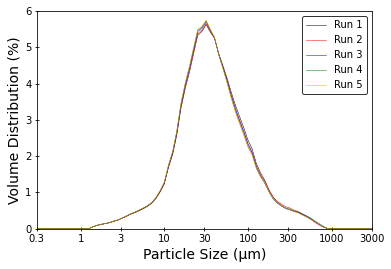

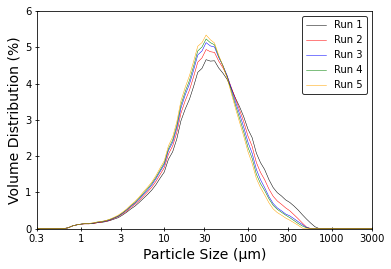

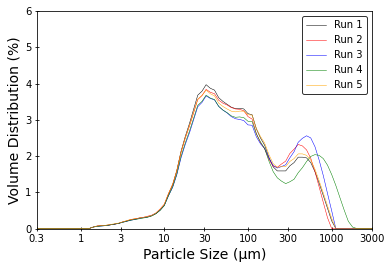

In [3]:
########################
### Step 2: Plotting ###
########################

for sn in sn_keep:
    df_sub = df[[col for col in df.columns if sn in col]]
    
    i = 1
    plt.figure()
    while i<=5:
        plt.plot(size, df_sub.iloc[:,i-1], c = color_code[i], lw = 0.5, label = 'Run %s' %i)
        i += 1

    plt.xscale('log')

    plt.xlim(0.3, 3000)
    a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    plt.xticks(ticks = a, labels = a)
    plt.minorticks_off()
    plt.xlabel('Particle Size (µm)', size = 14)
    
    plt.ylim(0, 6)
    plt.yticks(np.arange(0, 7, step=1))
    plt.ylabel('Volume Distribution (%)', size = 14)
        
    plt.legend(loc = 1, frameon = True, edgecolor = 'black', fontsize = 10)
    plt.tick_params(axis = 'both', direction = 'inout')

    plt.savefig(r'Figure_s4_' + sn + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code